In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Initialization/parametrization 

N = 11_000_000
I0, R0 = 1, 0
S0 = N - I0 - R0
beta, gamma = 0.6, 1./14 
t = np.linspace(0, 60, 60)
y0 = S0, I0, R0

In [3]:
# Process model for SIR 

def dev(y, t, N, beta, gamma):
    """
    This function gives us the differential equations we need in order to implement the model 
    Args: 
        y = vector of initial conditions
        t = time grid 
        beta = transmission rate 
        gamma = the rate of recovery
    Returns: 
        dSdt, dIdt, dRdt
    """
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [4]:
#Integrate the SIR equations over the time grid

ret = odeint(dev, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

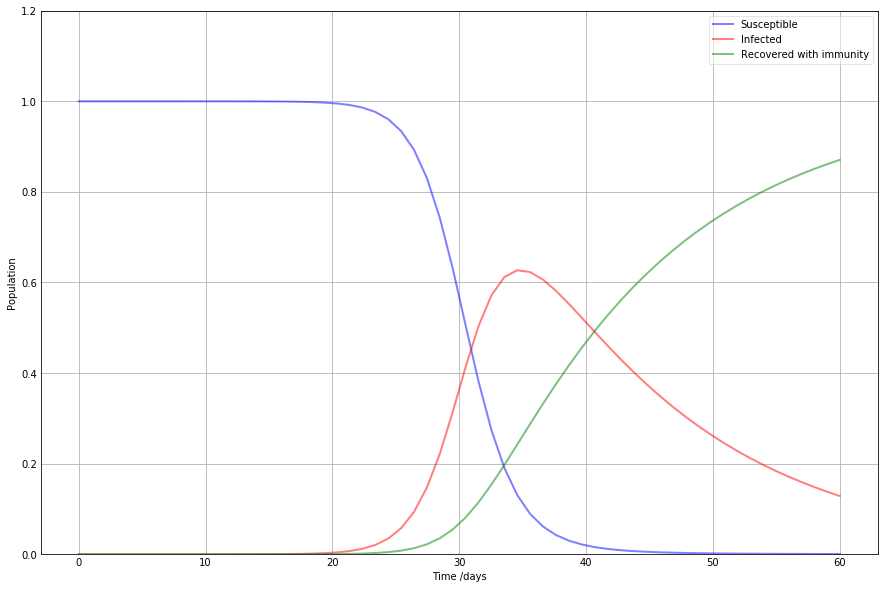

In [5]:
# We can plot our results 

fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/11_000_000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/11_000_000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/11_000_000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [6]:
def SEIR_model(initial, params, t):
    '''
    '''
    S_0, E_1_0, E_2_0, I_1_0, I_2_0, R_0, Q_0, D_0, C_0 = init_vals
    S, E1, E2, I1, I2, R, Q, D, C = [S_0], [E_1_0], [E_2_0], [I_1_0], [I_2_0], [R_0], [Q_0], [D_0], [C_0]
    sigma, beta, gamma, kappa = params
    dt = t[1] - t[0]
    for t_ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*(I1[-1] + I2[-1])/N) *dt              
        next_E1 = E1[-1] + (beta*S[-1]*(I1[-1] + I2[-1])/N - 2*sigma*E1[-1])*dt                      
        next_E2 = E2[-1] + (2*sigma*E1[-1] - 2*sigma*E2[-1])*dt                           
        next_I1 = I1[-1] + (2*sigma*E2[-1] - 2*gamma*I1[-1])*dt
        next_I2 = I2[-1] + (2*gamma*I1[-1] - 2*gamma*I2[-1])*dt   
        # Case tracking - including removal of cases within Q compartment
        next_Q = Q[-1] + (2*sigma*E2[-1]*np.exp(-gamma*kappa) - kappa*Q[-1])*dt      
        next_D = D[-1] + (2*sigma*E2[-1]*np.exp(-gamma*kappa))*dt
        next_C = C[-1] + (kappa*Q[-1])*dt
        next_R = R[-1] + (gamma*(I1[-1] + I2[-1]))*dt
        S.append(next_S)
        E1.append(next_E1)
        E2.append(next_E2)
        I1.append(next_I1)
        I2.append(next_I2)
        R.append(next_R)
        Q.append(next_Q)
        D.append(next_D)
        C.append(next_C) 
    return np.stack([S, E1, E2, I1, I2, R, Q, D, C]).T

In [7]:
beta= 2.5
sigma= 1/5.2
gamma= 1/2.9
kappa= 1/6.1
N= 11_000_000

In [8]:
# Define parameters
t_max = 160
dt = 0.1
t = np.linspace(0, t_max, t_max)
N = 11_000_000
init_vals = [N-1, 1, 0, 0, 0, 0, 0, 0, 0]
beta = 2.5
sigma= 1/5.2
gamma = 1/2.9
kappa = 1/6.1
params = sigma, beta, gamma, kappa

In [9]:
# Run simulation
results = SEIR_model(init_vals, params, t)

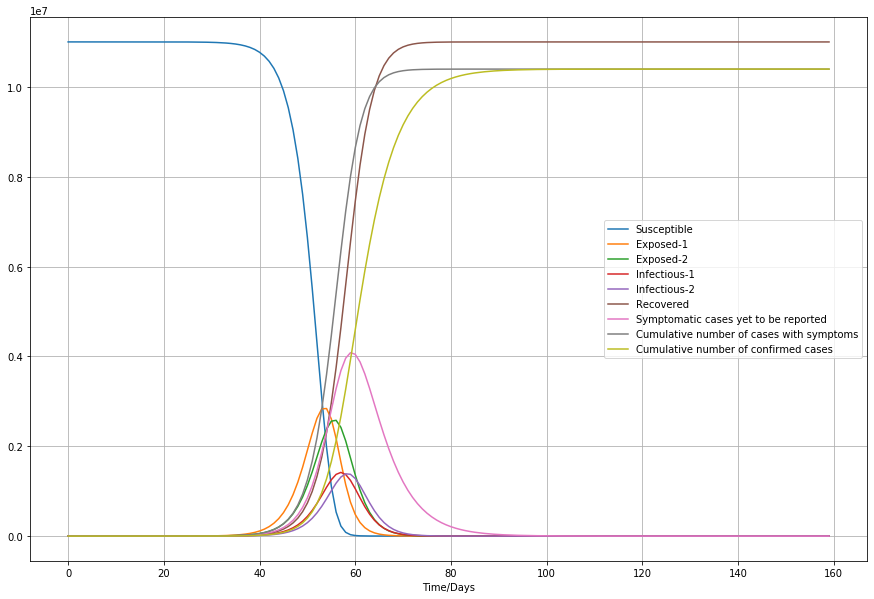

In [10]:
# Plot results
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(results)
plt.legend(['Susceptible', 
            'Exposed-1', 
            'Exposed-2', 
            'Infectious-1', 
            'Infectious-2', 
            'Recovered',
            'Symptomatic cases yet to be reported',
            'Cumulative number of cases with symptoms',
            'Cumulative number of confirmed cases'
           ])
plt.xlabel('Time/Days')
plt.show()

In [11]:
# If we change the parameter `beta`

beta = 4.5
sigma= 1/5.2
gamma = 1/2.9
kappa = 1/6.1
params = sigma, beta, gamma, kappa

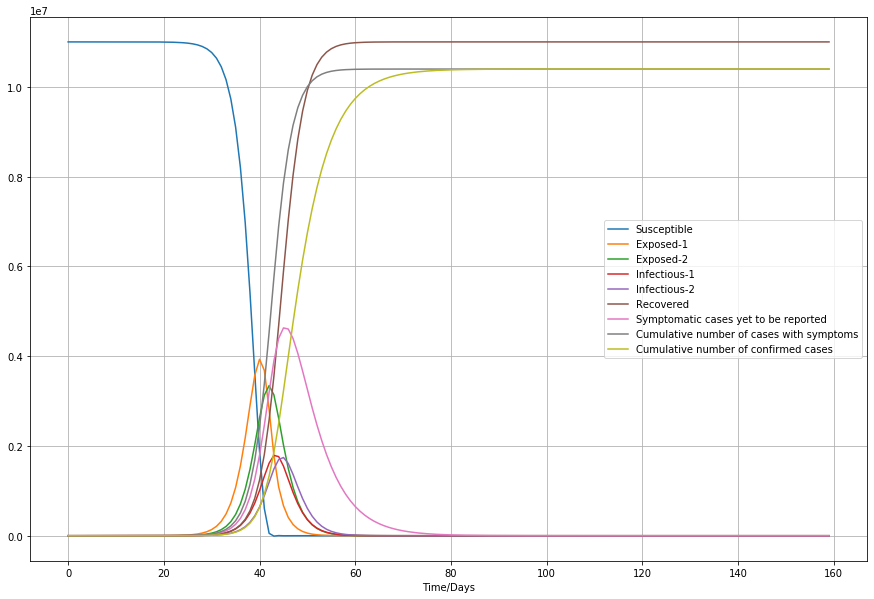

In [12]:
results = SEIR_model(init_vals, params, t)

plt.figure(figsize=(15,10))
plt.grid()
plt.plot(results)
plt.legend(['Susceptible', 
            'Exposed-1', 
            'Exposed-2', 
            'Infectious-1', 
            'Infectious-2', 
            'Recovered',
            'Symptomatic cases yet to be reported',
            'Cumulative number of cases with symptoms',
            'Cumulative number of confirmed cases'
           ])
plt.xlabel('Time/Days')
plt.show()

In [13]:
# If we change the number of initial cases to 10 

init_vals = [N-10, 10, 0, 0, 0, 0, 0, 0, 0]

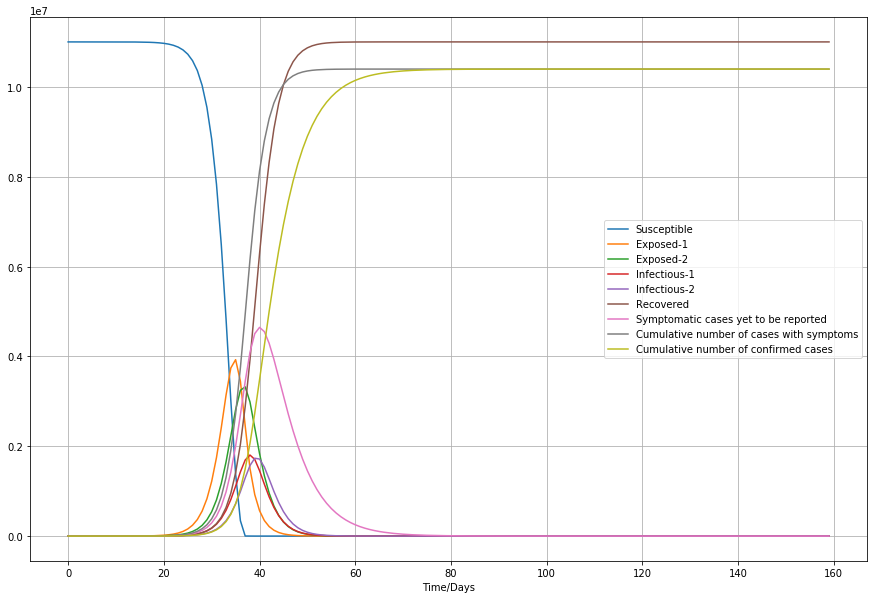

In [14]:
results = SEIR_model(init_vals, params, t)

plt.figure(figsize=(15,10))
plt.grid()
plt.plot(results)
plt.legend(['Susceptible', 
            'Exposed-1', 
            'Exposed-2', 
            'Infectious-1', 
            'Infectious-2', 
            'Recovered',
            'Symptomatic cases yet to be reported',
            'Cumulative number of cases with symptoms',
            'Cumulative number of confirmed cases'
           ])
plt.xlabel('Time/Days')
plt.show()


# Simulating the transmission rate : 

## Geometric Brownian Motion (GBM)

Now that we have simulated the outcome of the model with fixed parameters, we aim at simulating the transmission rate ($\beta(t)$) over time in order to have a more realistic and probabilistic approach.

($\beta(t)$) is assumed to be a geometric Brownian motion. The paper gives us a way to sample it :  we create a process 

          𝛽(t+1) = 𝛽(t)exp(X)
          
where X is normally distributed, with mean 0 and standard deviation a=0.4. 

To do so, we used a Box-Muller inversion method

    X =$\sqrt(−2log(U))$ ∗cos(2πV)

in order to simulate a random variable N(0,1), with U and V being uniformly distributed between 0 and 1.


## 1) Standard Random generator

In [1]:
from scipy.stats import erlang, norm, uniform
from numpy.random import exponential
from math import sqrt, pi, cos
import random

Note : we also generated created simulators for ($\sigma(t)$), ($\gamma(t)$) and ($\kappa(t)$) according to the laws they are assumed to have on the paper. However, the paper does not take into account the correlations between those laws (if you are symptomatic, the you are more likely to be isolated for instance). Therefore, we prefered not to run those simulations. 

In [42]:
# Geometric brownian motion estimation

def GBM_model(initial, params, t, beta):
#def GBM_model(initial, params, t, trans_rate = 2.6):
    '''
    '''
    S_0, E_1_0, E_2_0, I_1_0, I_2_0, R_0, Q_0, D_0, C_0 = init_vals
    S, E1, E2, I1, I2, R, Q, D, C = [S_0], [E_1_0], [E_2_0], [I_1_0], [I_2_0], [R_0], [Q_0], [D_0], [C_0]
    #beta = [trans_rate]
    a = 0.4
    
    sigma_0, gamma_0, kappa_0 = params
    sigma, gamma, kappa = [sigma_0], [gamma_0], [kappa_0]
    dt = t[1] - t[0]
    for t_ in t[1:]: 
        next_S = S[-1] - (beta[-1]*S[-1]*(I1[-1] + I2[-1])/N) *dt              
        next_E1 = E1[-1] + (beta[-1]*S[-1]*(I1[-1] + I2[-1])/N - 2*sigma[-1]*E1[-1])*dt                      
        next_E2 = E2[-1] + (2*sigma[-1]*E1[-1] - 2*sigma[-1]*E2[-1])*dt                           
        next_I1 = I1[-1] + (2*sigma[-1]*E2[-1] - 2*gamma[-1]*I1[-1])*dt
        next_I2 = I2[-1] + (2*gamma[-1]*I1[-1] - 2*gamma[-1]*I2[-1])*dt   
        next_Q = Q[-1] + (2*sigma[-1]*E2[-1]*np.exp(-gamma[-1]*kappa[-1]) - kappa[-1]*Q[-1])*dt      
        next_D = D[-1] + (2*sigma[-1]*E2[-1]*np.exp(-gamma[-1]*kappa[-1]))*dt
        next_C = C[-1] + (kappa[-1]*Q[-1])*dt
        next_R = R[-1] + (gamma[-1]*(I1[-1] + I2[-1]))*dt
        S.append(next_S)
        E1.append(next_E1)
        E2.append(next_E2)
        I1.append(next_I1)
        I2.append(next_I2)
        R.append(next_R)
        Q.append(next_Q)
        D.append(next_D)
        C.append(next_C) 
        next_beta = beta[-1]*np.exp(a*np.sqrt(-2*np.log(uniform.rvs()))*cos(2*np.pi*uniform.rvs()))
        #next_sigma = 1/erlang.rvs(a=5.2)
        #next_beta = beta[-1]*np.exp(a*norm.rvs()) version directe d'implémentation de la loi normale
        #next_gamma = 1/erlang.rvs(a=2.9)
        #next_kappa = 1/exponential(6.1)
        #sigma.append(next_sigma)
        beta.append(next_beta)
        #gamma.append(next_gamma)
        #kappa.append(next_kappa)
    return np.stack([S, E1, E2, I1, I2, R, Q, D, C]).T

In [48]:
init_vals = [N-10, 10, 0, 0, 0, 0, 0, 0, 0]
t = np.linspace(0, 160, 160)
#kappa0 = 1/exponential(6.1)
#gamma0 = 1/erlang.rvs(a=2.9)
#sigma0 = 1/erlang.rvs(a=5.2)
sigma0 = 1/5.2
gamma0 = 1/2.9
kappa0 = 1/6.1
params = [sigma0, gamma0, kappa0]
trans_rate = 2.6
beta = [trans_rate]

In [49]:
results = GBM_model(init_vals, params, t, beta)

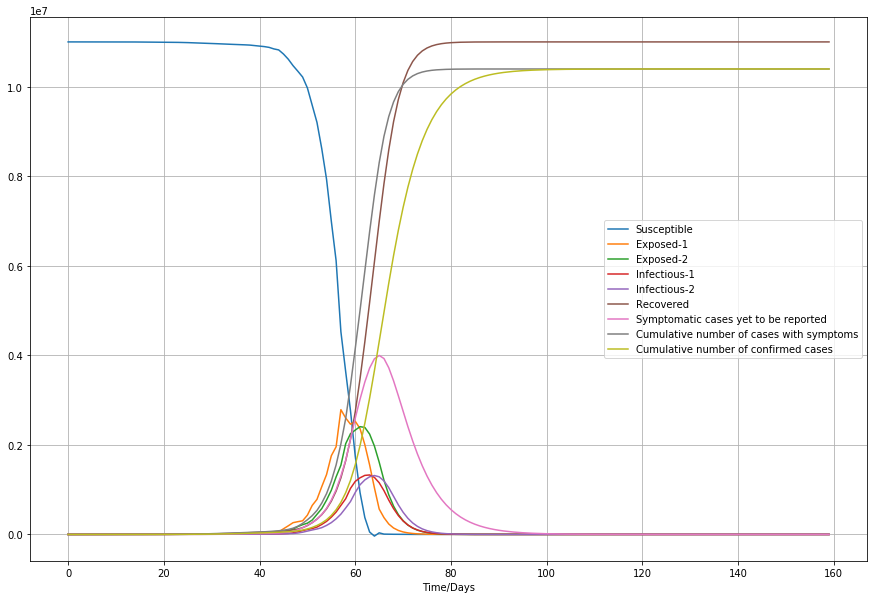

In [50]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(results)
plt.legend(['Susceptible', 
            'Exposed-1', 
            'Exposed-2', 
            'Infectious-1', 
            'Infectious-2', 
            'Recovered',
            'Symptomatic cases yet to be reported',
            'Cumulative number of cases with symptoms',
            'Cumulative number of confirmed cases'
           ])
plt.xlabel('Time/Days')
plt.show()

## 2) Quasi Monte Carlo using Mersenne twister PRNG

In [20]:
# Geometric brownian motion estimation

def QMC_model(initial, params, t, trans_rate = 2.6):
    '''
    '''
    S_0, E_1_0, E_2_0, I_1_0, I_2_0, R_0, Q_0, D_0, C_0 = init_vals
    S, E1, E2, I1, I2, R, Q, D, C = [S_0], [E_1_0], [E_2_0], [I_1_0], [I_2_0], [R_0], [Q_0], [D_0], [C_0]
    #beta = [trans_rate]
    a = 0.4
    
    sigma_0, gamma_0, kappa_0 = params
    sigma, gamma, kappa = [sigma_0], [gamma_0], [kappa_0]
    dt = t[1] - t[0]
    for t_ in t[1:]: 
        next_S = S[-1] - (beta[-1]*S[-1]*(I1[-1] + I2[-1])/N) *dt              
        next_E1 = E1[-1] + (beta[-1]*S[-1]*(I1[-1] + I2[-1])/N - 2*sigma[-1]*E1[-1])*dt                      
        next_E2 = E2[-1] + (2*sigma[-1]*E1[-1] - 2*sigma[-1]*E2[-1])*dt                           
        next_I1 = I1[-1] + (2*sigma[-1]*E2[-1] - 2*gamma[-1]*I1[-1])*dt
        next_I2 = I2[-1] + (2*gamma[-1]*I1[-1] - 2*gamma[-1]*I2[-1])*dt   
        # Case tracking - including removal of cases within Q compartment
        next_Q = Q[-1] + (2*sigma[-1]*E2[-1]*np.exp(-gamma[-1]*kappa[-1]) - kappa[-1]*Q[-1])*dt      
        next_D = D[-1] + (2*sigma[-1]*E2[-1]*np.exp(-gamma[-1]*kappa[-1]))*dt
        next_C = C[-1] + (kappa[-1]*Q[-1])*dt
        next_R = R[-1] + (gamma[-1]*(I1[-1] + I2[-1]))*dt
        #next_sigma = 1/erlang.rvs(a=5.2)
        next_beta = beta[-1]*np.exp(a*np.sqrt(-2*np.log(random.random()))*cos(2*np.pi*random.random()))
        #next_gamma = 1/erlang.rvs(a=2.9)
        #next_kappa = 1/exponential(6.1)
        S.append(next_S)
        E1.append(next_E1)
        E2.append(next_E2)
        I1.append(next_I1)
        I2.append(next_I2)
        R.append(next_R)
        Q.append(next_Q)
        D.append(next_D)
        C.append(next_C) 
        #sigma.append(next_sigma)
        beta.append(next_beta)
        #gamma.append(next_gamma)
        #kappa.append(next_kappa)
    return np.stack([S, E1, E2, I1, I2, R, Q, D, C]).T


In [21]:
init_vals = [N-10, 10, 0, 0, 0, 0, 0, 0, 0]
t = np.linspace(0, 160, 160)
#kappa0 = 1/exponential(6.1)
#gamma0 = 1/erlang.rvs(a=2.9)
#sigma0 = 1/erlang.rvs(a=5.2)
sigma0 = 1/5.2
gamma0 = 1/2.9
kappa0 = 1/6.1
params = [sigma0, gamma0, kappa0]
trans_rate = 2.6


In [22]:
results = QMC_model(init_vals, params, t)

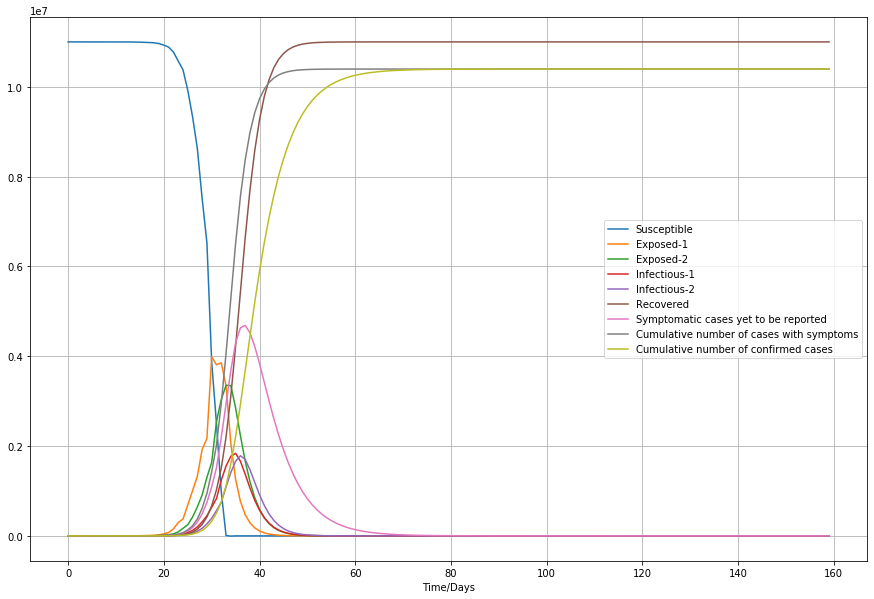

In [23]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(results)
plt.legend(['Susceptible', 
            'Exposed-1', 
            'Exposed-2', 
            'Infectious-1', 
            'Infectious-2', 
            'Recovered',
            'Symptomatic cases yet to be reported',
            'Cumulative number of cases with symptoms',
            'Cumulative number of confirmed cases'
           ])
plt.xlabel('Time/Days')
plt.show()